### Importing packages

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

### Importing dataset

In [2]:
df = pd.read_csv('./datasets/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

### Dataset Description

There are no missing values in this dataset. It has the following attributes:

1. gender - gender of student
2. race/ethnicity - categorized into 5 groups based on nationality, culture, religion, linguistics, etc
3. parental level of education - tells how much student's parents have studied
4. lunch - whether student takes standard lunch or free/reduced lunch
5. test preparation course - whether student has completed any test preparation course
6. math score - math score out of 100
7. reading score - reading score out of 100
8. writing score - writing score out of 100

In [5]:
sns.set(style='whitegrid')

### Creating a sub dataframe containing only score columns

In [6]:
scores = df.loc[:,'math score':'writing score']

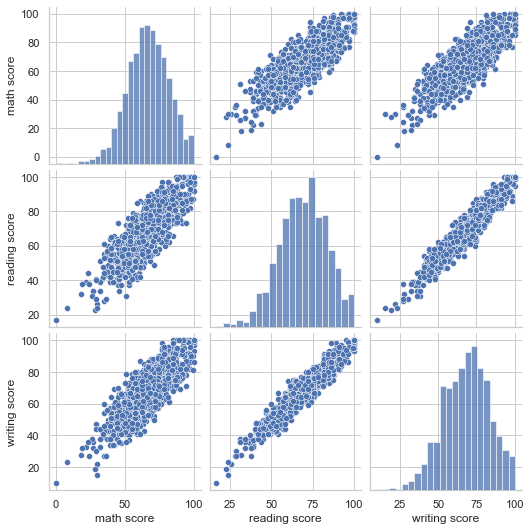

In [7]:
sns.pairplot(scores, kind="scatter")

### Interpretation of above plot:

If student scores good in one test then it is very much likely that he/she scores well in other two tests. The data is highly correlated

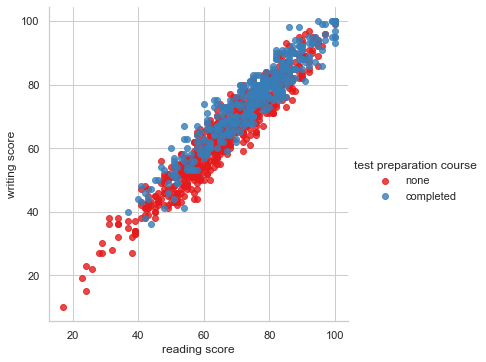

In [8]:
sns.lmplot(x='reading score', y='writing score', data=df, fit_reg=False, hue='test preparation course', legend=True, palette='Set1')

### Interpretation of above plot:

The above scatter plot between reading and writing scores tell almost every student who has completed the course scores above 40 in reading and writing. Whereas there are some students who's score is less than 40 that have not taken any course. 

### Creating avg score column

In [9]:
df['avg score'] = scores.mean(axis=1)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


<AxesSubplot:xlabel='test preparation course', ylabel='avg score'>

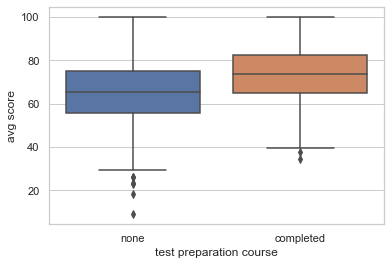

In [10]:
sns.boxplot(y=df['avg score'],x=df['test preparation course'])

### Interpretation of above plot:

From the above box plot it is clear that performance is slightly better if student has taken the course

<AxesSubplot:xlabel='writing score', ylabel='Count'>

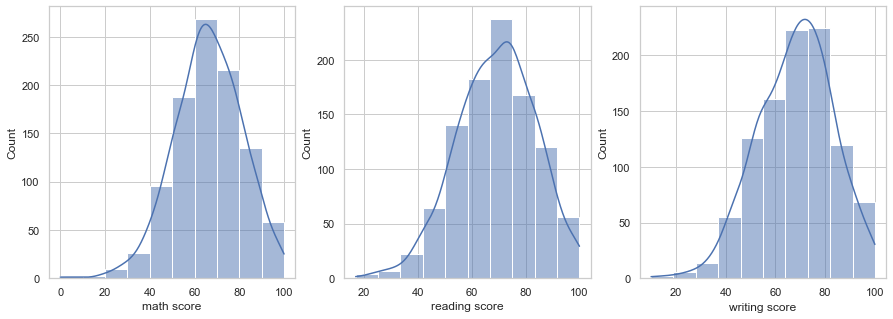

In [11]:
f, axes = plt.subplots(1, 3, figsize=(15,5))
sns.histplot(df['math score'],kde=True, bins=10, ax=axes[0])
sns.histplot(df['reading score'],kde=True, bins=10, ax=axes[1])
sns.histplot(df['writing score'],kde=True, bins=10, ax=axes[2])

### Interpretation of above plots:

Many students score in the range 60 to 80.

<AxesSubplot:xlabel='race/ethnicity', ylabel='count'>

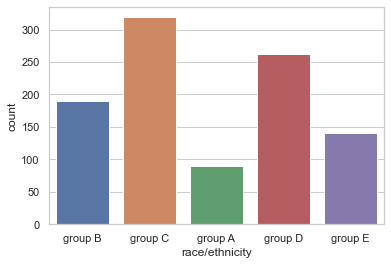

In [12]:
sns.countplot(x='race/ethnicity', data=df)

### Interpretation of above plot:

Most of the students belong to group C and group D. There are only few students belonging to group A.

[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

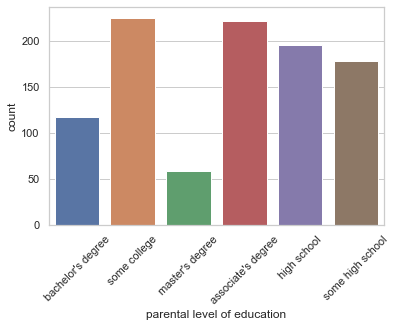

In [13]:
sns.countplot(x='parental level of education', data=df).set_xticklabels(df['parental level of education'].unique(), rotation=45)

### Interpretation of above plot:

Very few student's parents hold a masters degree.

c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='avg score', ylabel='Count'>

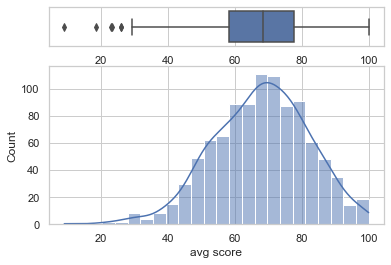

In [14]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios': (0.2, 0.8)})
sns.boxplot(df['avg score'], ax=ax_box)
sns.histplot(df['avg score'], ax=ax_hist, kde=True)

### Interpretation of above plot:

Most of the student's score lies in the range 60 to 80. The score below 30 can be considered as outlier data.

[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

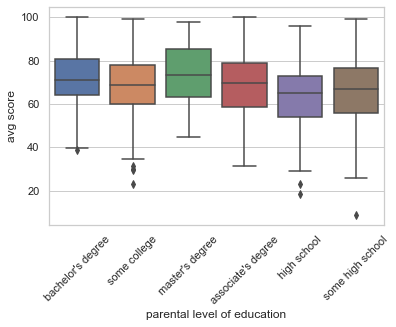

In [15]:
sns.boxplot(y=df['avg score'],x=df['parental level of education']).set_xticklabels(df['parental level of education'].unique(), rotation=45)

### Interpretation of above plot:

The students who's parents have a masters degree have a slightly better performance.

<AxesSubplot:xlabel='avg score', ylabel='Count'>

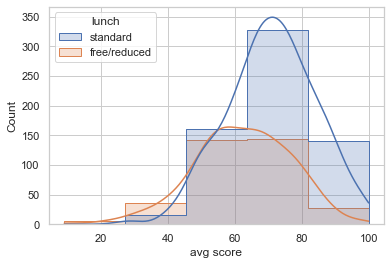

In [16]:
sns.histplot(x='avg score', hue='lunch',data=df, element='step', bins=5, kde=True)

<AxesSubplot:xlabel='test preparation course', ylabel='count'>

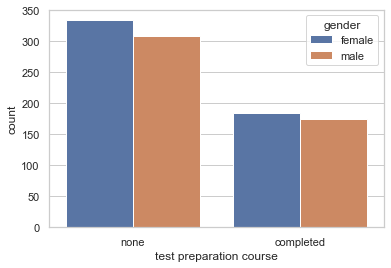

In [17]:
sns.countplot(x='test preparation course', data=df, hue='gender')

### Interpretation of above plot:

Majority of the students have not taken any test preparation course

<AxesSubplot:xlabel='lunch', ylabel='count'>

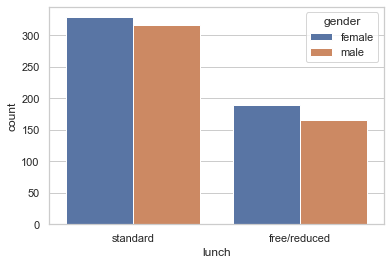

In [18]:
sns.countplot(x='lunch', data=df, hue='gender')

### Interpretation of above plot:

Majority of the students take standard lunch.